In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
#from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

Using TensorFlow backend.


In [2]:
df = pd.read_csv('../Data/train.csv', header=0)
X = df.iloc[:,0:-1].copy()
Y = df.iloc[:, -1].copy()

#scaler = StandardScaler()
#X = scaler.fit_transform(X)

df = pd.read_csv('../Data/validation_under.csv', header=0)
X_valid = df.iloc[:,0:-1].copy()
Y_valid = df.iloc[:, -1].copy()
#scaler = StandardScaler()
#X_valid = scaler.fit_transform(X_valid)

# Handle the dataset with undersampling strategy
rus = RandomUnderSampler(sampling_strategy=0.8)
X_res, Y_res = rus.fit_resample(X, Y)

# Handle the dataset with oversampling strategy
ros = RandomOverSampler(random_state=0)
X_resampled, Y_resampled = ros.fit_resample(X, Y)

# Handle the dataset with SMOTE
SM = SMOTE(random_state=0)
X_smote, Y_smote = SM.fit_sample(X, Y)

score_infor = [[],[],[],[]]
roc_auc_score_infor = [[],[],[],[]]
f1_score_infor = [[],[],[],[]]

In [3]:
#print(pd.value_counts(Y_smote))
for weight_percent in range(1, 100):

    class_weight = {0: weight_percent, 1: (100-weight_percent)}

    lr = LogisticRegression(random_state=0, class_weight=class_weight, solver='lbfgs')
    classifier = lr.fit(X, Y)
    #classifier_probs = classifier.predict_proba(X_valid)
    #print("Classifer with balanced class weight only: ")
    Y_predit = classifier.predict(X_valid)
    #print(classification_report(Y_valid, Y_predit))
    report = classification_report(Y_valid, Y_predit, output_dict = True)
    f1_score_infor[0].append(report['1']['f1-score'])
    #print(report)
    #print(f1_score_infor[0])
    score_infor[0].append(report)
    roc_auc_score_infor[0].append(roc_auc_score(Y_valid, Y_predit))
    
    #print(pd.value_counts(Y_res))

    #class_weight = {0: 5, 1: 4}
    lr = LogisticRegression(random_state=0, class_weight=class_weight, solver='lbfgs')
    classifier = lr.fit(X_res, Y_res)
    #print("Classifer with undersampling dataset: ")
    Y_predit = classifier.predict(X_valid)
    #print(classification_report(Y_valid, Y_predit))
    #roc_auc_score(Y_valid, Y_predit)
    report = classification_report(Y_valid, Y_predit, output_dict = True)
    f1_score_infor[1].append(report['1']['f1-score'])
    score_infor[1].append(report)
    roc_auc_score_infor[1].append(roc_auc_score(Y_valid, Y_predit))


    #print(pd.value_counts(Y_resampled))

    #class_weight = {0: 90, 1: 10}
    lr = LogisticRegression(random_state=0, class_weight=class_weight, solver='lbfgs')
    classifier = lr.fit(X_resampled, Y_resampled)
    #print("Classifer with oversampling dataset: ")
    Y_predit = classifier.predict(X_valid)
    #print(classification_report(Y_valid, Y_predit))
    report = classification_report(Y_valid, Y_predit, output_dict = True)
    f1_score_infor[2].append(report['1']['f1-score'])
    score_infor[2].append(report)
    roc_auc_score_infor[2].append(roc_auc_score(Y_valid, Y_predit))


    #class_weight = {0: 90, 1: 10}
    lr = LogisticRegression(random_state=0, class_weight=class_weight, solver='lbfgs')
    classifier = lr.fit(X_smote, Y_smote)
    #print("Classifer with SMOTE on dataset: ")
    Y_predit = classifier.predict(X_valid)
    #print(classification_report(Y_valid, Y_predit))
    report = classification_report(Y_valid, Y_predit, output_dict = True)
    f1_score_infor[3].append(report['1']['f1-score'])
    score_infor[3].append(report)
    roc_auc_score_infor[3].append(roc_auc_score(Y_valid, Y_predit))

/home/jupyter/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/jupyter/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/jupyter/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/jupyter/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/jupyter/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.


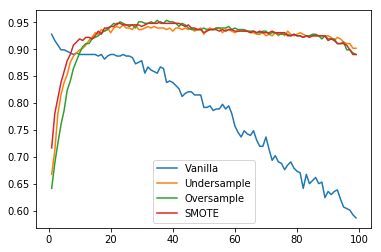

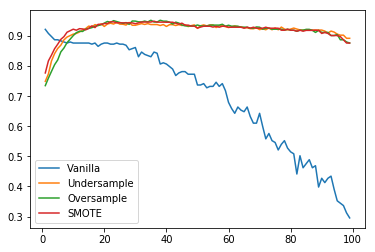

0
23
34
35
[0.9277456647398844, 0.9450867052023122, 0.9537572254335259, 0.9508670520231214]
{'weighted avg': {'f1-score': 0.927366467659185, 'support': 346, 'precision': 0.9368686868686869, 'recall': 0.9277456647398844}, 'accuracy': 0.9277456647398844, 'macro avg': {'f1-score': 0.927366467659185, 'support': 346, 'precision': 0.9368686868686869, 'recall': 0.9277456647398844}, '0': {'f1-score': 0.9326145552560646, 'support': 173, 'precision': 0.8737373737373737, 'recall': 1.0}, '1': {'f1-score': 0.9221183800623053, 'support': 173, 'precision': 1.0, 'recall': 0.8554913294797688}}
{'weighted avg': {'f1-score': 0.9450862465021092, 'support': 346, 'precision': 0.9451015771184177, 'recall': 0.9450867052023122}, 'accuracy': 0.9450867052023122, 'macro avg': {'f1-score': 0.9450862465021093, 'support': 346, 'precision': 0.9451015771184175, 'recall': 0.9450867052023122}, '0': {'f1-score': 0.9449275362318841, 'support': 173, 'precision': 0.9476744186046512, 'recall': 0.9421965317919075}, '1': {'f1-

In [4]:
x = np.linspace(1, 99, num=99)
plt.plot(x, roc_auc_score_infor[0], label="Vanilla")
plt.plot(x, roc_auc_score_infor[1], label="Undersample")
plt.plot(x, roc_auc_score_infor[2], label="Oversample")
plt.plot(x, roc_auc_score_infor[3], label="SMOTE")
plt.legend(loc='best')
plt.show()

plt.plot(x, f1_score_infor[0], label="Vanilla")
plt.plot(x, f1_score_infor[1], label="Undersample")
plt.plot(x, f1_score_infor[2], label="Oversample")
plt.plot(x, f1_score_infor[3], label="SMOTE")
plt.legend(loc='best')
plt.show()

maxpos_0 = roc_auc_score_infor[0].index(max(roc_auc_score_infor[0]))
maxpos_1 = roc_auc_score_infor[1].index(max(roc_auc_score_infor[1]))
maxpos_2 = roc_auc_score_infor[2].index(max(roc_auc_score_infor[2]))
maxpos_3 = roc_auc_score_infor[3].index(max(roc_auc_score_infor[3]))
print(maxpos_0)
print(maxpos_1)
print(maxpos_2)
print(maxpos_3)
print([roc_auc_score_infor[0][maxpos_0], roc_auc_score_infor[1][maxpos_1], roc_auc_score_infor[2][maxpos_2], roc_auc_score_infor[3][maxpos_3]])

print(score_infor[0][maxpos_0])
print(score_infor[1][maxpos_1])
print(score_infor[2][maxpos_2])
print(score_infor[3][maxpos_3])

maxpos_0 = f1_score_infor[0].index(max(f1_score_infor[0]))
maxpos_1 = f1_score_infor[1].index(max(f1_score_infor[1]))
maxpos_2 = f1_score_infor[2].index(max(f1_score_infor[2]))
maxpos_3 = f1_score_infor[3].index(max(f1_score_infor[3]))
print(maxpos_0)
print(maxpos_1)
print(maxpos_2)
print(maxpos_3)
print([f1_score_infor[0][maxpos_0], f1_score_infor[1][maxpos_1], f1_score_infor[2][maxpos_2], f1_score_infor[3][maxpos_3]])

print(score_infor[0][maxpos_0])
print(score_infor[1][maxpos_1])
print(score_infor[2][maxpos_2])
print(score_infor[3][maxpos_3])
